***************************************************************EDA*************************************************************

Below is an example of the Machine Learning model that will take different Climate and Soil conditions and predict a crop that can make maximum growth in these certain conditions

In [1]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/data.csv')
df.columns=['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorous  2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [2]:
df.groupby('label').mean()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [3]:
import ipywidgets as widgets
import seaborn as sns

def dropdownlist(conditions):
    avg=round(df[conditions].mean(),2)
    print(50*'-',f'\nAverage value for {conditions} is: ', avg, '\n'*2,
          round(df.groupby('label')[conditions].mean(),2), sep='')
    sns.displot(df[conditions], kde=True, color='red')
    
widgets.interact(dropdownlist, conditions=df._get_numeric_data().columns, description='conditions:')    


interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorous', 'Potassium', 'tem…

<function __main__.dropdownlist(conditions)>

In [4]:
def dropdown2(crops):
    for i in df._get_numeric_data().columns:
        minv=round(df.loc[df.label==crops, i].min(),2)
        avg=round(df.loc[df.label==crops, i].mean(),2)
        maxv=round(df.loc[df.label==crops, i].max(),2)
        print(
          50*'*','\n'
          f'Statistics for {i}:\n',
          f'Minimum {i} requied {minv}\n',
          f'Average {i} requied {avg}\n',
          f'Maximum {i} requied {maxv}\n',
          sep='')

widgets.interact(dropdown2, crops=df.label.unique())   

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

<function __main__.dropdown2(crops)>

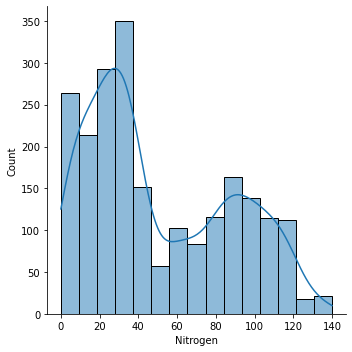

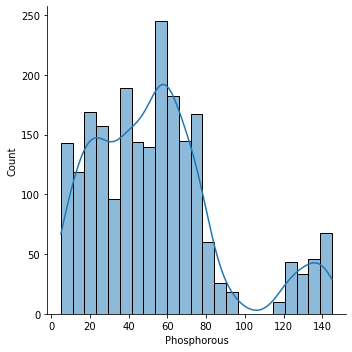

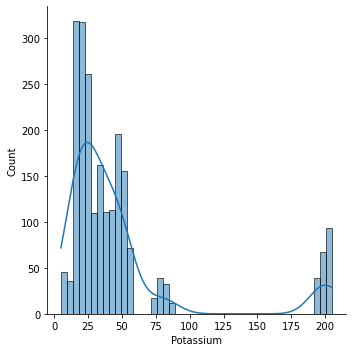

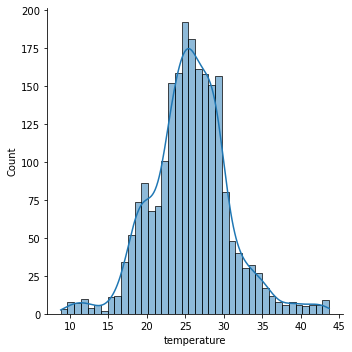

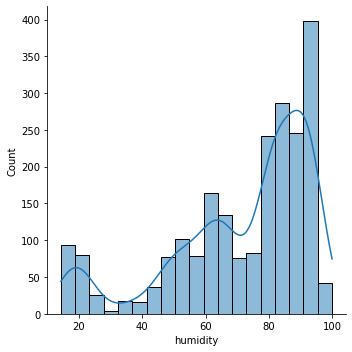

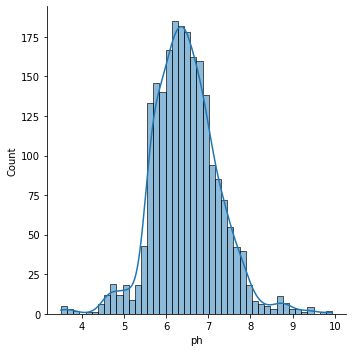

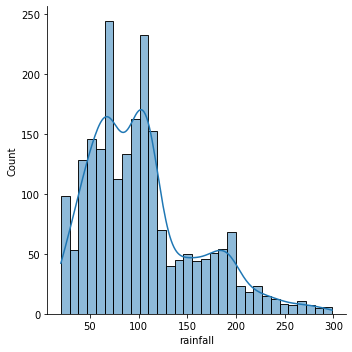

In [5]:
for i in df._get_numeric_data().columns:
    sns.displot(df, x=i, kde=True)

array([[<AxesSubplot:title={'center':'Nitrogen'}>,
        <AxesSubplot:title={'center':'Phosphorous'}>,
        <AxesSubplot:title={'center':'Potassium'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

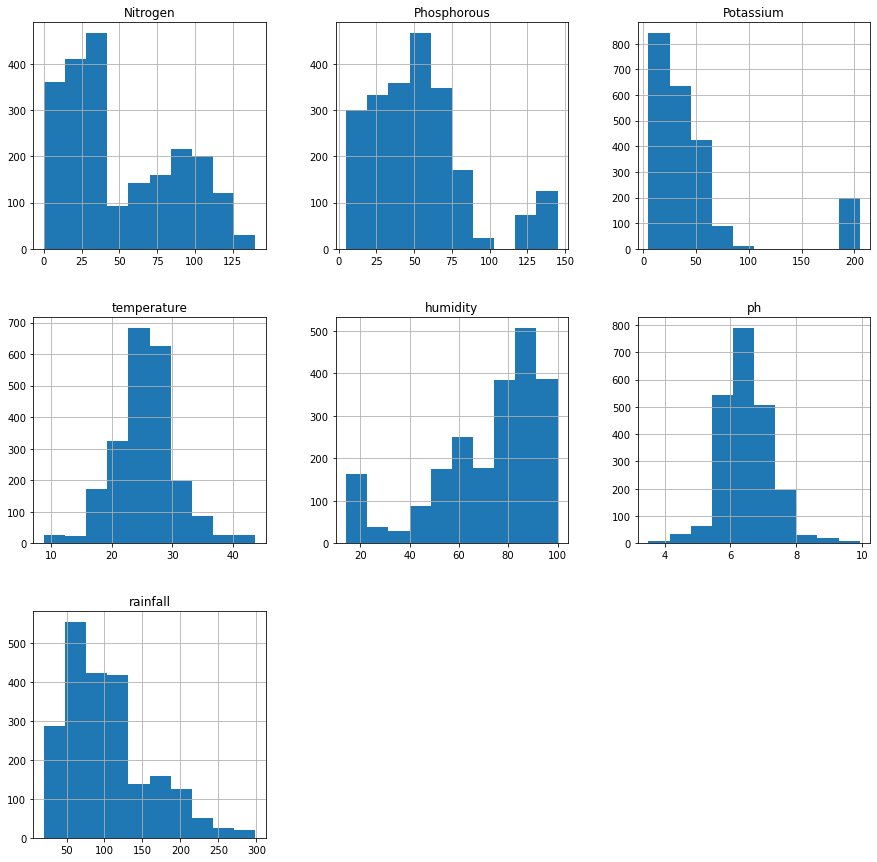

In [6]:
pd.DataFrame.hist(df, figsize = [15,15])

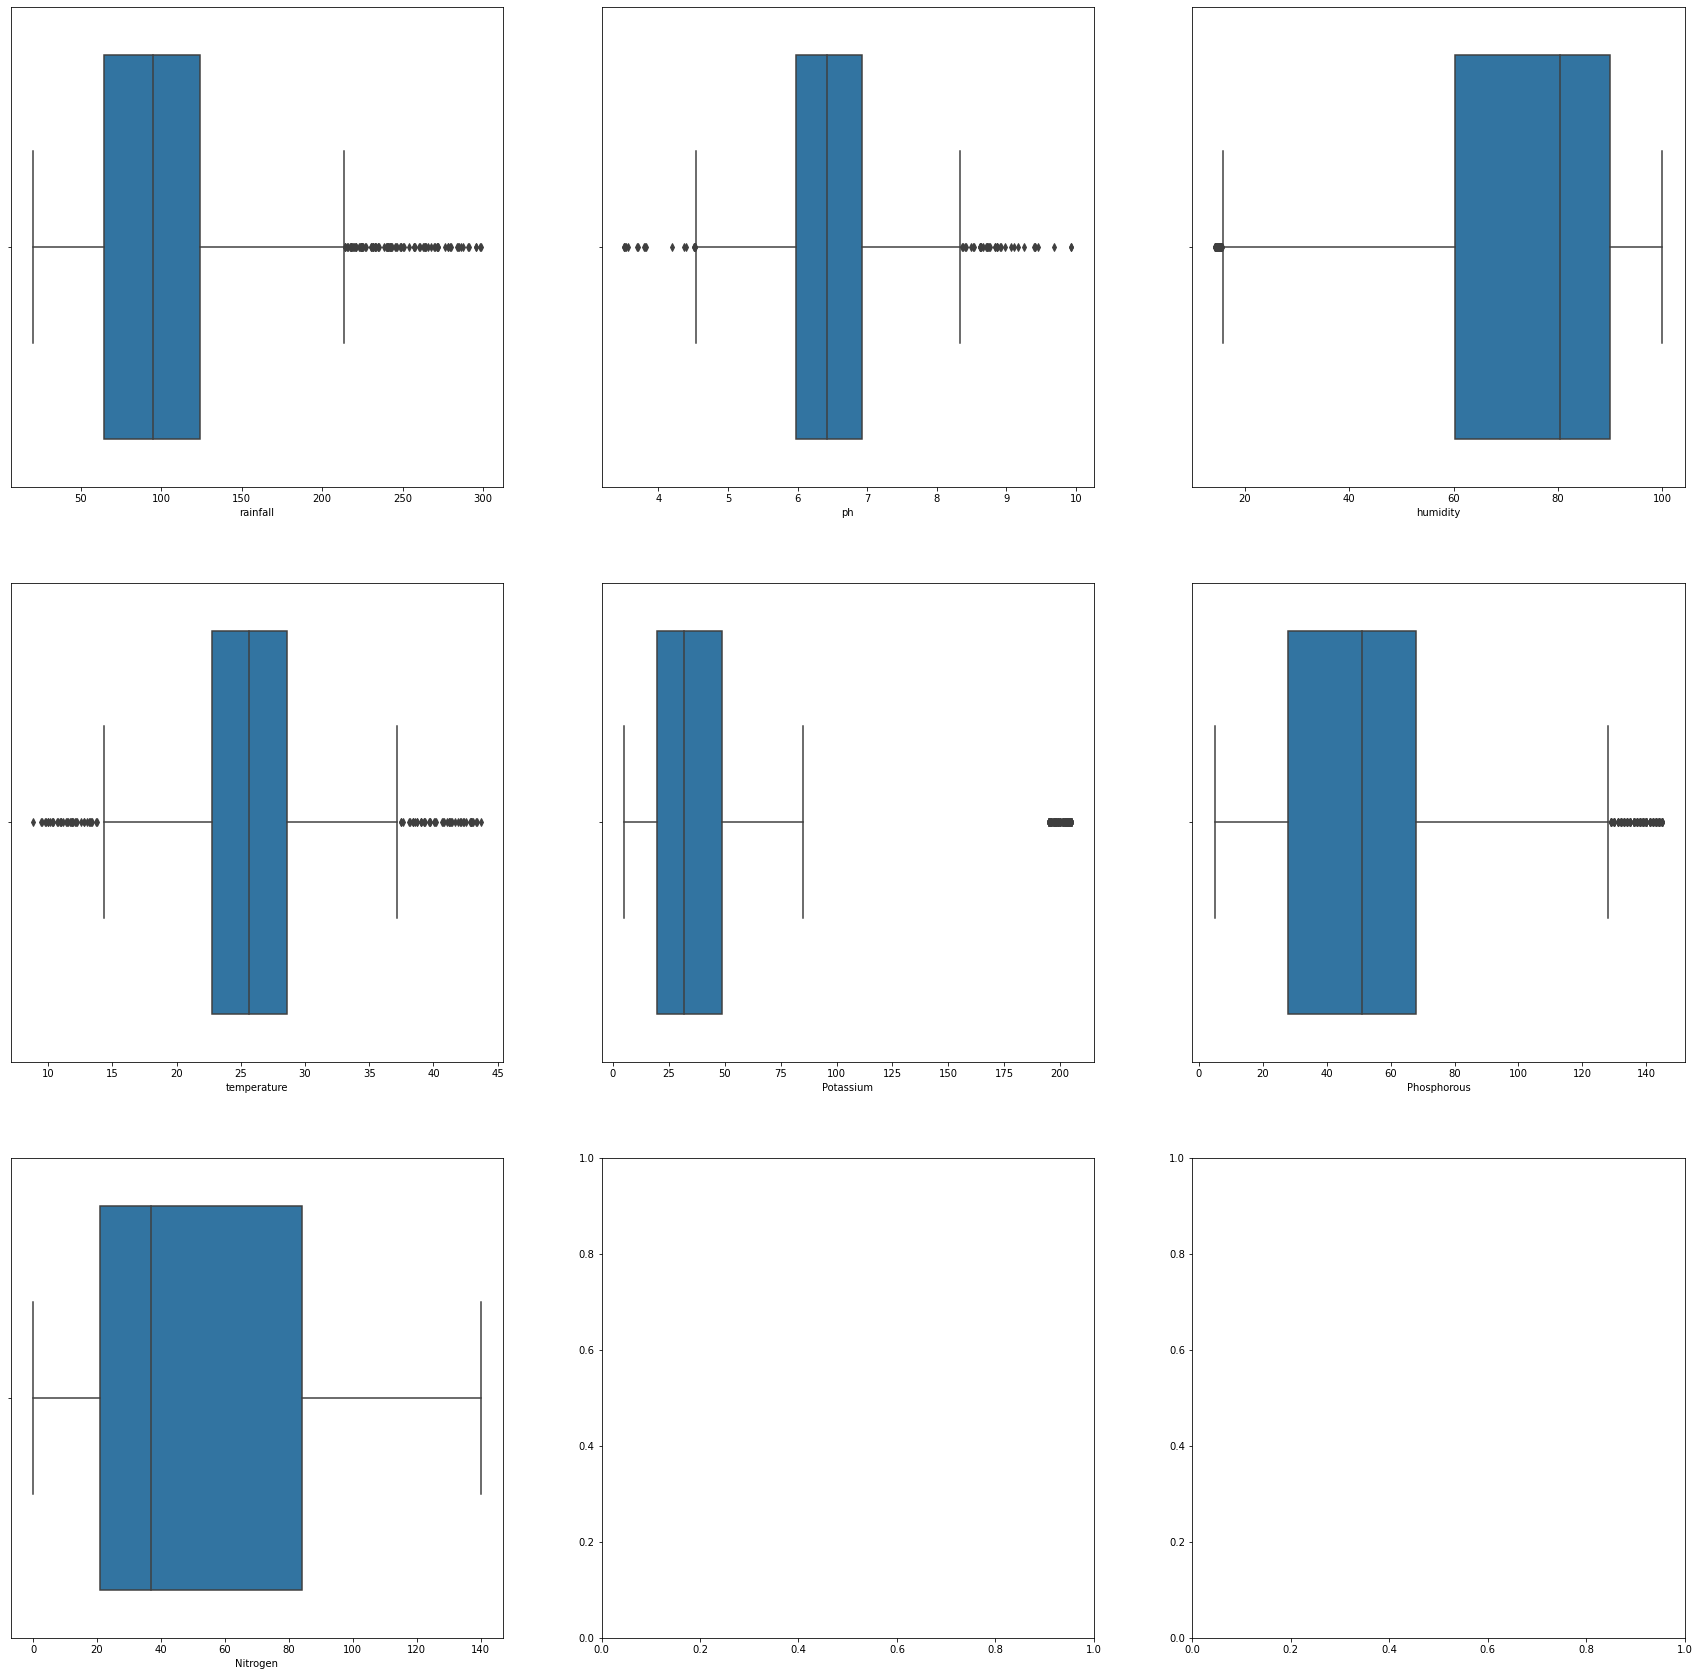

In [7]:
#*****************************************************OUTLIERS:

import math
import matplotlib.pyplot as plt

num_col=df._get_numeric_data().columns.tolist()

row=3
col=math.ceil(len(num_col)/row)

fig, axes = plt.subplots(row,col, figsize=(30,30))

for r in range(row):
    for c in range(col):
        if not num_col:
            continue
        sns.boxplot(data=df, x=num_col.pop(), ax=axes[r][c])

In [15]:
#*********************************************SCALING:
from sklearn.model_selection import train_test_split

X=df.drop('label', axis=1).values
y=df['label'].values

# from sklearn.preprocessing import scale
# X=scale(X)
# X


In [16]:
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [17]:
#*****************************************************TRAIN TEST SPLIT:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


In [18]:
#********************************************************MODEL:
# LABEL = CATEGORICAL VARIABLES = LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train, y_train)

predictions=model.predict(X_test)


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#**************************************************SCORE:
from sklearn.metrics import classification_report

report=classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      0.95      0.98        22
   blackgram       0.75      0.83      0.79        18
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        18
      cotton       0.94      0.80      0.86        20
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.91      0.89        22
 kidneybeans       0.95      1.00      0.97        19
      lentil       0.91      0.83      0.87        12
       maize       0.76      0.94      0.84        17
       mango       1.00      0.95      0.97        20
   mothbeans       0.92      0.85      0.88        26
    mungbean       1.00      0.95      0.97        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.91    

In [20]:
import numpy as np

while True:
    k=[float(input('Ratio of Nitrogen in the soil: ')), 
       float(input('Ratio of Phosphorous in the soil: ')),
       float(input('Ratio of Potassium in the soil: ')),
       float(input('Tempereture in celcius: ')),
       float(input('Relative humidity in the soil: ')),
       float(input('PH value for the soil: ')),
       float(input('Rainfall in 1mm: '))]
    pred=model.predict(np.array([k]))
    print(f'\nThe suggested crop for given climate condition: {pred}', sep='')
    rep=input('Do you want to continue? If yes, press "Yes": ')
    if rep.lower() !='yes':
        print('Finish')
        break

Ratio of Nitrogen in the soil: 90
Ratio of Phosphorous in the soil: 40
Ratio of Potassium in the soil: 40
Tempereture in celcius: 30
Relative humidity in the soil: 70
PH value for the soil: 6
Rainfall in 1mm: 200

The suggested crop for given climate condition: ['jute']
Do you want to continue? If yes, press "Yes": yes
Ratio of Nitrogen in the soil: 10
Ratio of Phosphorous in the soil: 20
Ratio of Potassium in the soil: 70
Tempereture in celcius: 50
Relative humidity in the soil: 80
PH value for the soil: 2
Rainfall in 1mm: 700

The suggested crop for given climate condition: ['rice']
Do you want to continue? If yes, press "Yes": no
Finish
